<a href="https://colab.research.google.com/github/K-3620/LinearRegression/blob/main/%EA%B3%A0%EA%B8%89%ED%9A%8C%EA%B7%80%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/데이터수집/2010년/2010년.csv',index_col=0)
data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,7540,7820,7480,7520,177197,-0.007916
2010-01-05,7490,7580,7350,7500,214314,-0.002660
2010-01-06,7500,7500,7320,7350,81874,-0.020000
2010-01-07,7350,7420,7200,7210,106474,-0.019048
2010-01-08,7220,7330,7220,7240,61393,0.004161


In [ ]:
# 불필요한 컬럼 삭제
data.drop(['Volume','Change'],axis=1)

,Open,High,Low,Close
Date,,,,
2010-01-04,7540,7820,7480,7520
2010-01-05,7490,7580,7350,7500
2010-01-06,7500,7500,7320,7350
2010-01-07,7350,7420,7200,7210
2010-01-08,7220,7330,7220,7240
...,...,...,...,...
2010-12-24,5120,5120,4990,5070
2010-12-27,5080,5120,5020,5050
2010-12-28,5030,5140,5030,5110


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

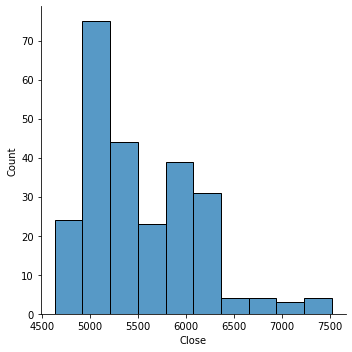

In [ ]:
sns.displot(data['Close'])

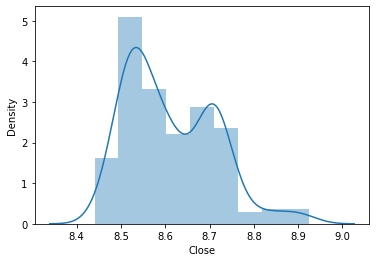

In [ ]:
log_Close = np.log1p(data['Close'])
sns.distplot(log_Close)

In [ ]:
# 로그변환
log_target = np.log1p(data['Close']) # 답
log_features = np.log1p(data.drop('Close',axis=1,inplace=False))

In [ ]:
# 여러 모델의 로그 변환된 RMSE 측정 함수
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test,pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
  return rmse

def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
y_target = data['Close'] # 답
X_features = data.drop('Close',axis=1,inplace=False)
X_train,X_test,y_train,y_test = \
train_test_split(
    X_features
    ,y_target
    ,test_size =0.8
    ,shuffle = False
)

In [ ]:
# LinearRegression,Ridge,Lasso 학습,예측,평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 39.813
Ridge 로그 변환된 RMSE: 50.464
Lasso 로그 변환된 RMSE: 50.653


[39.81304330825269, 50.46443134757256, 50.65336345191539]

In [ ]:
y_target = log_target # 답
X_features = log_features # 학습
X_train,X_test,y_train,y_test = \
train_test_split(
    X_features
    ,y_target
    ,test_size =0.8
    ,shuffle = False
)

In [ ]:
# 로그 변환 데이터로 LinearRegression,Ridge,Lasso 학습,예측,평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.007
Ridge 로그 변환된 RMSE: 0.113
Lasso 로그 변환된 RMSE: 0.188


[0.006718137678504268, 0.1127235811771223, 0.18798296226350472]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 5개의 교차 검증 폴드 세트 분할 평균 RMSE 측정
def get_avg_rmse_cv(models):

  for model in models:
    rmse_list = np.sqrt(-cross_val_score(model,X_features,y_target
                                         ,scoring='neg_mean_squared_error',cv=5))
    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트 : {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
    print('\n{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))

In [ ]:
models = [lr_reg,ridge_reg,lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트 : [0.005 0.005 0.006 0.005 0.005]

LinearRegression CV 평균 RMSE 값 : 0.005

Ridge CV RMSE 값 리스트 : [0.041 0.024 0.015 0.015 0.017]

Ridge CV 평균 RMSE 값 : 0.022

Lasso CV RMSE 값 리스트 : [0.186 0.102 0.07  0.093 0.113]

Lasso CV 평균 RMSE 값 : 0.113


In [ ]:
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
  grid_model = GridSearchCV(model,param_grid=params
                            ,scoring='neg_mean_squared_error',cv=5)
  grid_model.fit(X_features,y_target)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV시 최적 평균 RMSE 값:{1},최적 alpha:{2}'
        .format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))
  


In [ ]:
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.0066,최적 alpha:{'alpha': 0.05}
Lasso 5 CV시 최적 평균 RMSE 값:0.0196,최적 alpha:{'alpha': 0.001}


In [ ]:
# 최적화 alpha 값으로 학습/예측/평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.007
Ridge 로그 변환된 RMSE: 0.022
Lasso 로그 변환된 RMSE: 0.044


[0.006718137678504268, 0.022451020420766403, 0.04405547354623761]

In [ ]:
### 스태킹 앙상블 모델을 통한 회귀 예측

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
def get_stacking_base_datasets(model,X_train_n,y_train_n,X_test_n,n_folds):
  kf = KFold(n_splits=n_folds,shuffle=False,random_state=0)

  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter,(train_index,valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 학습/예측할 폴드 데이터 세트 추출
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습데이터로 학습 수행
    model.fit(X_tr,y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증데이터로 예측 후 데이터 저장
    train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 포드 세트 내 학습된 모델에 예측 후 데이터 저장
    test_pred[:,folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred,axis=1).reshape(-1,1)

    return train_fold_pred,test_pred_mean


In [ ]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train,ridge_test = \
get_stacking_base_datasets(ridge_reg,X_train_n,y_train_n,X_test_n,5)
lasso_train,lasso_test = \
get_stacking_base_datasets(lasso_reg,X_train_n,y_train_n,X_test_n,5)

Ridge model 시작
Lasso model 시작


In [ ]:
# 학습/테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train,lasso_train),axis=1)
Stack_final_X_test = np.concatenate((ridge_test,lasso_test),axis=1)

# 최종 메타 모델은 라쏘 모델 적용
meta_model_lasso = Lasso(alpha=0.001)

# 새로 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정
meta_model_lasso.fit(Stack_final_X_train,y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test,final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값 : ',rmse)

스태킹 회귀 모델의 최종 RMSE 값 :  0.18727229469272466
